In this notebook, I will build a Linear regression model to forecast insurance bill using [Medical cost dataset](https://www.kaggle.com/datasets/mirichoi0218/insurance). The dataset consists of age, sex, BMI(body mass index), children, smoker and region feature, which are independent and charge as a dependent feature. I will predict individual medical costs billed by health insurance.

Linear regression is a supervised learning technique employed when the target or dependent variable consists of continuous real numbers. It aims to establish a relationship between the dependent variable (𝑦) and one or more independent variables (𝑥) by determining the best-fit line. This method operates based on the principle of Ordinary Least Squares (OLS) or Mean Square Error (MSE). In statistics, OLS is a technique used to estimate unknown parameters of a linear regression function, with the objective of minimizing the sum of squared differences between the observed dependent variable in the provided dataset and the values predicted by the linear regression function.

# Import Libraries

In [1]:
import pandas  as pd  #Data manipulation
import numpy as np    #Data manipulation
import matplotlib.pyplot as plt  #Data visualization
import seaborn as sns #Data visualization

In [2]:
# Import dataset
df = pd.read_csv('insurance.csv') 
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
print('Number of rows and columns in the data set: ', df.shape)

Number of rows and columns in the data set:  (1338, 7)


In [4]:
# Check info for any missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Since there is no null values, let's get the descriptive statistics about the dataset.

In [5]:
# Generate descriptive statistics

df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


From above statistics we can see that the data health seems to be in perfect shape with no missing data values and the data quartiles and mean presenting a picture where the data seems to be in fine shape. For categorical columns relationships with charges, we'll compare the average cahrges of each category in the columns.

In [6]:
# Calculate the mean sales for each region category. 

print(df.groupby('region')['charges'].mean())

print('')


# Calculate the mean sales for each sex category.
 
print(df.groupby('sex')['charges'].mean())

print('')

# Calculate the mean sales for each smoker category.

print(df.groupby('smoker')['charges'].mean())

region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64

sex
female    12569.578844
male      13956.751178
Name: charges, dtype: float64

smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64


Interestingly, the variations in averages across the categories in the area and sex columns are negligible, indicating that they are rather poor predictors of charge cost. This is not the case in the smoker column, where the average charge cost is approximately four times that of nonsmokers. As a result, the smoker column is a critical predictive variable. 

# Encode Categorical Values


When we look at the data, we can see that quite a few variables are categorical in nature. The problem with categorical features is that they represent discrete values with no natural numerical ordering or magnitude. Label encoding assigns a number label to each distinct category in the categorical feature. However, label encoding presupposes an order or ranking of the categories, which may not be acceptable for all categorical data. It may bring unwanted correlations or biases into the data.

In [7]:
# Import label encoder
from sklearn.preprocessing import LabelEncoder

#Label encoding on sex
le = LabelEncoder()
le.fit(df.sex.drop_duplicates()) 
df.sex = le.transform(df.sex)

#Label encoding on smokers
le.fit(df.smoker.drop_duplicates()) 
df.smoker = le.transform(df.smoker)

#Label encoding on region
le.fit(df.region.drop_duplicates()) 
df.region = le.transform(df.region)

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


# Exploratory Data Analysis

Now, let's look for multicolinearity among independent variables here. If there is a large correlation between variables, the coefficient estimations may be incorrect. We can eliminate such variables or use regularisation techniques like ridge or lasso to put penalties on the coefficients, decreasing them towards zero and lowering their reliance on highly correlated variables to reduce the influence of multi-colinearity. 

Firts let's create a feature variable to see the relationship between BMI and Charges for people with high BMI vs people with low BMI.

In [8]:
df.loc[df['bmi'] > df['bmi'].mean(), 'bmi_high'] = 1
df.loc[df['bmi'] <= df['bmi'].mean(), 'bmi_high'] = 0

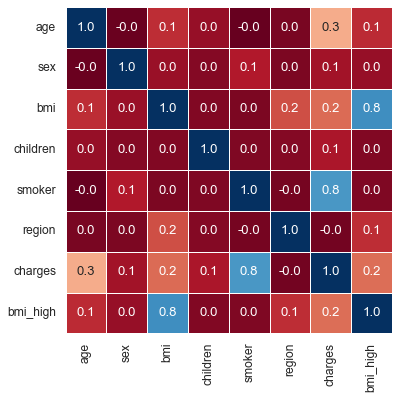

In [9]:
# Seeing the correlation between variables 
sns.set_style("darkgrid")
sns.set(font_scale = 1.1)
plt.figure(figsize=(8, 6))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot = True, fmt = '.1f',
            cmap='RdBu', linecolor='white', square = True, linewidths = 1, cbar = False)
plt.show()

Let's see distribution of charges with respect to age.

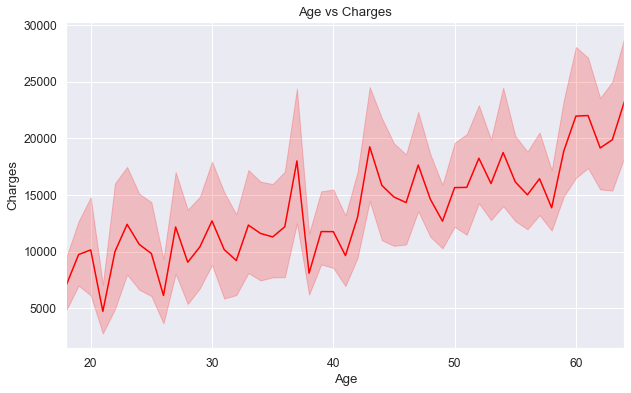

In [10]:
# Create the figure and axes
fig, ax1 = plt.subplots(figsize = (10, 6))

# Create the line chart for the y-axis
sns.lineplot(data = df, x = "age", y = "charges", ax = ax1, color = 'red')

# Set labels and title
ax1.set_xlabel("Age")
ax1.set_ylabel("Charges")
ax1.set_title("Age vs Charges")
ax1.set_xlim([18,64])

# Show the plot
plt.show()


This leads us to a basic conclusion that with growing age the charges naturally go up. Let's see how high BMI contributes to the insurance charge.

Text(0.5, 1.0, 'Age vs BMI')

<Figure size 720x576 with 0 Axes>

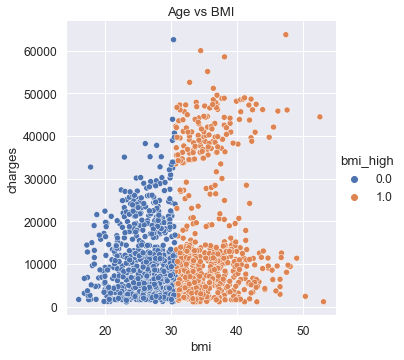

In [11]:
plt.figure(figsize=(10, 8))
sns.relplot(data = df, x = "bmi", y = "charges", hue = "bmi_high")
plt.title("Age vs BMI")

The regression line clearly shows that those with higher than average BMI have greater charges than people with lower BMI. Also, lower BMI is mostly associated with younger people. 

Let's Draw the boxplot to see if there is any relationship between charges and no. of chilren -

Text(0.5, 0, 'Children no. vs. Charges')

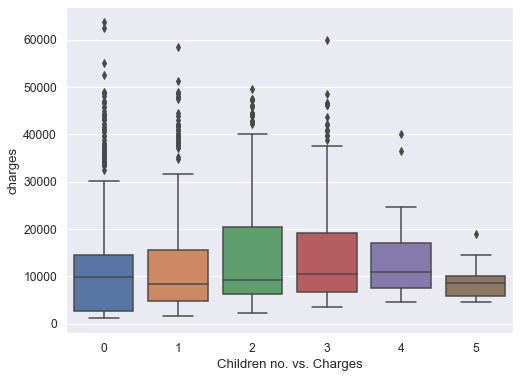

In [12]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x=df.children, y=df.charges)
plt.xlabel("Children no. vs. Charges")

No. of children doesn't affect much on the insurance charges as we see there is not much difference of the median charge in each case. However, we see for people with 5 children has quite less charges. Now, we have previously seen that smoking increases the charges significantly. Let's have a look into that feature now. Also, showing the proportion of sex helps. 

<AxesSubplot:xlabel='smoker', ylabel='charges'>

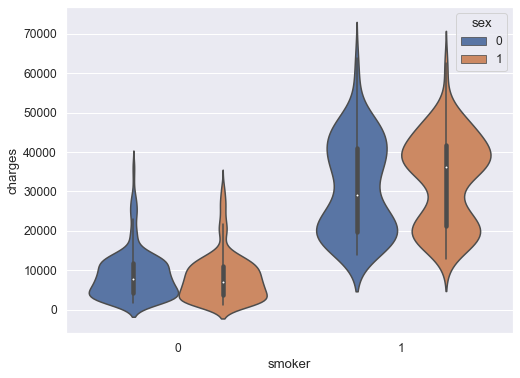

In [13]:
plt.figure(figsize=(8, 6))
sns.violinplot(x = "smoker", y = "charges", hue = "sex", data = df)

It becomes clear that the smoker parameter is a strong predictor. Let's see what role 'age' plays in accordance with the smoking.

(18.0, 64.0)

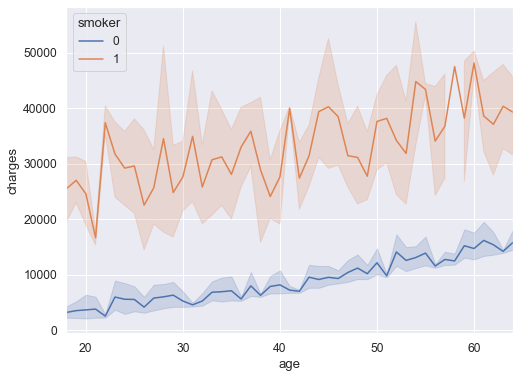

In [14]:
# Create the line chart for the y-axis
plt.figure(figsize=(8, 6))
sns.lineplot(data=df, x="age", y="charges", hue = "smoker")
plt.xlim([18,64])

Yes, we can conclude that smokers have a very high correlation to the charges incurred.

# Building Model

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot

#Splitting the data into test and train 
x = df.drop('charges', axis=1)  # Remove the target variable column
y = df['charges']  # Keep only the target variable column

# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [18]:
# Add a constant column to the feature matrix
x_train = sm.add_constant(x_train)

# Create and fit the OLS model
ols_model = sm.OLS(y_train, x_train)
ols_results = ols_model.fit()

# Predict on the test set
x_test = sm.add_constant(x_test)
y_test_pred = ols_results.predict(x_test)


# Model Validation

To validate a model, it is necessary to assess several assumptions of the linear regression model ([Detail description here](https://statisticsbyjim.com/regression/ols-linear-regression-assumptions/)). The common assumptions for a Linear Regression model are as follows:

**Linear Relationship:** In linear regression, there should be a linear relationship between the dependent and independent variables. This can be examined by creating a scatter plot of the actual values versus the predicted values.

**Normality of Residual Errors:** The residual errors should follow a normal distribution. This can be evaluated by inspecting the plot of the residual errors.

**Zero Mean of Residual Errors:** The mean of the residual errors should ideally be zero or close to zero. This can be assessed by calculating the average value of the residual errors.

**Multivariate Normality:** Linear regression assumes that all variables are multivariate normal. This assumption can be best evaluated using a Q-Q plot, which compares the distribution of the residuals to a normal distribution.

**Homoscedasticity:** The data should exhibit homoscedasticity, meaning that the residuals have equal variances across the regression line. This can be examined by creating a scatter plot of the residuals versus the fitted values. If the plot shows a funnel-shaped pattern, it indicates heteroscedasticity.

In order to validate the model, these assumptions of linear regression should be checked.

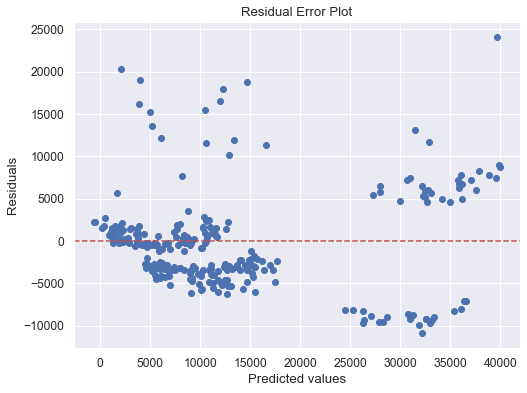

In [19]:
# Calculate the residuals ( observed values - fitted values)
residuals = y_test - y_test_pred

# Create a residual plot
plt.figure(figsize=(8, 6))

plt.scatter(y_test_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual Error Plot')
plt.show()


**Interpretation of the Residual Error Plot:**
Because the plot is random and the residuals exhibit no discernible pattern or curvatur, the model appropriately represents the underlying connection between the predictors and the response variable.

<Figure size 576x432 with 0 Axes>

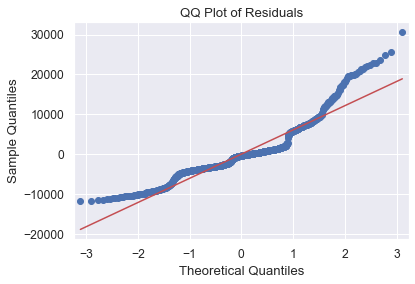

In [20]:
## Drawing  a QQ plot
plt.figure(figsize=(8, 6))
# Get the residuals
residuals = ols_results.resid

# Plot the QQ plot
qqplot(residuals, line='s')
plt.title('QQ Plot of Residuals')
plt.show()


**Interpretation of the QQ Plot:**
A QQ plot enables us to determine whether the data has a normal distribution. If the data points on a QQ plot nearly follow a straight line, it indicates that the data is approximately normally distributed. Deviations from the straight line represent deviations from normalcy.


# Results explained!

In [21]:
ols_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     442.0
Date:                Mon, 26 Jun 2023   Prob (F-statistic):          2.09e-309
Time:                        13:05:36   Log-Likelihood:                -10840.
No. Observations:                1070   AIC:                         2.170e+04
Df Residuals:                    1062   BIC:                         2.174e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8547.3887   1474.036     -5.799      0.000   -1.14e+04   -5655.034
age          256.0346     13.389     19.123      0.000     229.762     282.307
sex          -25.1702    373.929     -0.067      0.946    -758.893     708.553
bmi          193.0153     52.549      3.673      0.000      89.904     296.126
children     412.5435    153.717      2.684      0.007     110.920     714.167
smoker      2.362e+04    463.016     51.020      0.000    2.27e+04    2.45e+04
region      -266.9349    169.541     -1.574      0.116    -599.608      65.739
bmi_high    2143.4188    631.485      3.394      0.001     904.319    3382.518
==============================================================================
Omnibus:                      265.256   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              673.185
Skew:                           1.297   Prob(JB):                    6.60e-147
Kurtosis:                       5.892   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Based on the results of the statistical parameters, an explanation of how well the OLS model performed is given below:

**Coefficients:** The coefficients represent the estimated effect of each independent variable on the dependent variable.

* The positive coefficient for "age" (256.03) indicates that, on average, as age increases by one unit, the dependent variable increases by 256.03 units.
* The negative coefficient for "sex" (-25.17) suggests that, on average, being male is associated with a slight decrease in the dependent variable, but it is not statistically significant.
* The positive coefficient for "bmi" (193.02) implies that, on average, an increase in BMI by one unit leads to an increase in the dependent variable by 193.02 units.
* The positive coefficient for "children" (412.54) suggests that, on average, each additional child is associated with an increase in the dependent variable by 412.54 units.
* The significant positive coefficient for "smoker" (2.362e+04) indicates that being a smoker is strongly associated with a substantial increase in the dependent variable.
* The coefficient for "region" (-266.93) suggests a slight negative association with the dependent variable, but it is not statistically significant.
* The positive coefficient for "bmi_high" (2143.42) implies that individuals with higher BMI values have, on average, a higher dependent variable value.

**P-values:** The p-values provide evidence of the statistical significance of the coefficients.

* The low p-values for "age," "bmi," "children," "smoker," and "bmi_high" indicate that these variables are statistically significant in explaining the dependent variable.
* The high p-values for "sex" and "region" suggest that these variables are not statistically significant in the model.

**T-stats:** The t-statistics measure the number of standard deviations the coefficients are away from zero.

* The large t-values for "age," "bmi," "children," "smoker," and "bmi_high" suggest that these coefficients are significantly different from zero.
* The t-values for "sex" and "region" are close to zero, indicating that these coefficients are not statistically significant.

**F-statistic:** The F-statistic assesses the overall significance of the model.

The high F-statistic (442.03) suggests that the model, as a whole, is statistically significant, indicating that at least one of the independent variables is significantly associated with the dependent variable.

**R-squared:** The R-squared value (0.74) represents the proportion of the variance in the dependent variable explained by the independent variables. It indicates that the model explains approximately 74% of the variability in the dependent variable based on the included predictors.

**RMSE:** The root mean square error (RMSE) measures the average deviation of the predicted values from the actual values. The RMSE value of 5770.31 indicates the average difference between the predicted and actual values of the dependent variable.

Overall, the model performs reasonably well, with a high R-squared value suggesting a good fit to the data. Significant coefficients for "age," "bmi," "children," "smoker," and "bmi_high" indicate their strong influence on the dependent variable. However, the variables "sex" and "region" do not seem to have a significant impact in this model. The RMSE value can be used to assess the accuracy of the model's predictions, with a lower value indicating better predictive performance.